In [15]:
import numpy as np
import matplotlib.pyplot as plt

# importing all types of Gradient Descent: BatchGD , MiniBatchGD and StochasticGD
from GradientDescent import BatchGD, StochasticGD, LinearSearchGD


plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 15
plt.rcParams["grid.linestyle"] = "--"

# 1. Nonlinear Regression

### 1. Plot the training data. Write a code in Python to perform nonlinear regression on the given data. Implement batch gradient descent algorithm for optimization. (Choose α = 0.01, number of iterations = 50000)

In [16]:
prob1 = np.loadtxt('data/prob1data.txt', delimiter=',')
# displaying top 5 data points
prob1[:,:5]

array([[ 0.        ,  0.04      ,  0.08      ,  0.12      ,  0.16      ],
       [-0.49440425, -0.37673774,  0.67663803,  2.4000521 ,  2.1663244 ]])

In [17]:
# transposing the prob1
prob1 = prob1.T

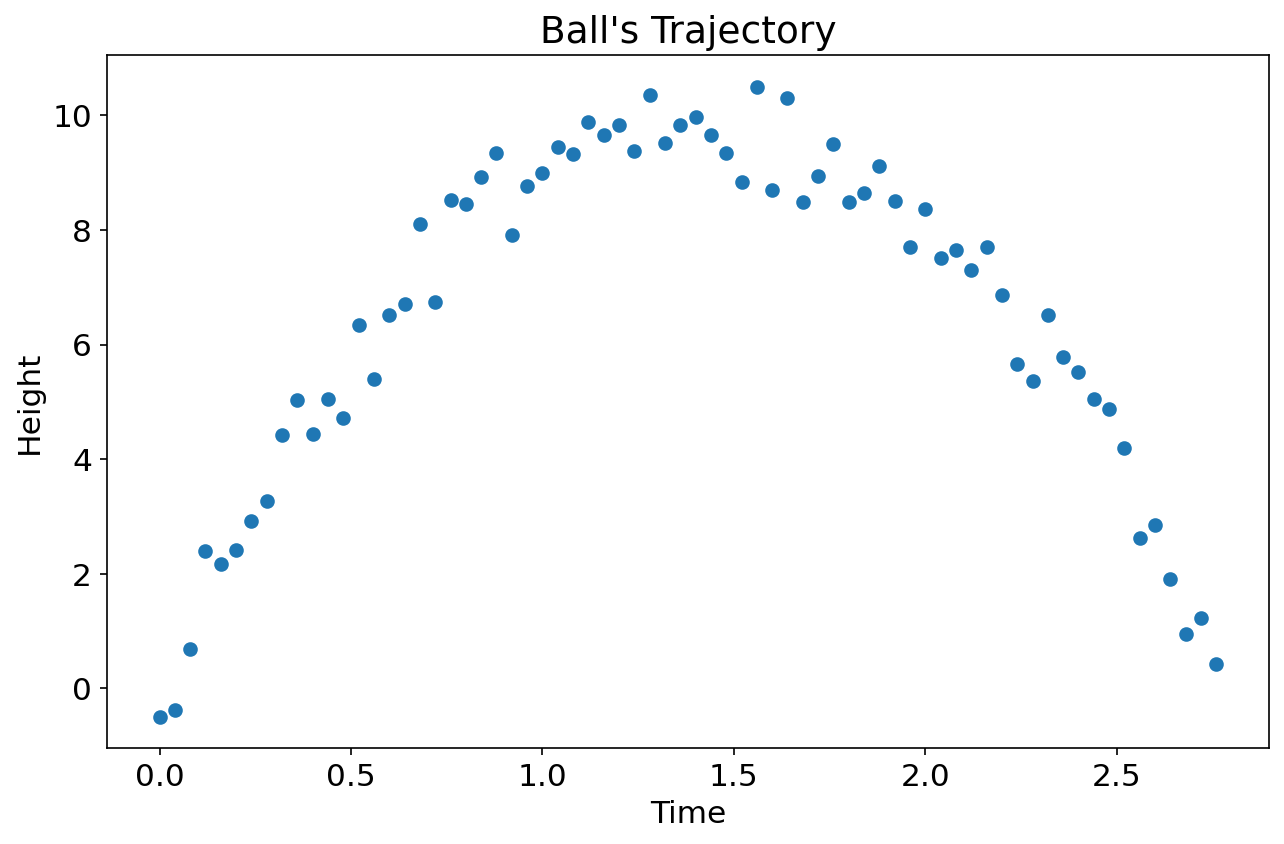

<Figure size 1500x900 with 0 Axes>

In [19]:
plt.plot(prob1[:,0], prob1[:,1], 'o')
plt.xlabel('Time')
plt.ylabel('Height')
plt.title("Ball's Trajectory")
plt.show()
plt.savefig('figures/0101.png')

- We have 1 feature ($x_1$) and one output (y), so the hypothesis function is:

$$h_w(x) = w_1 x$$


- Now adding the bias term in the hypothesis:

$$h_w(x) = w_0 + w_1 x$$


- adding the $x^2$ term, we get:

$$h_w(x) = w_0 + w_1 x + w_2 x^2$$

**Note**: writing the hypothesis function in this way is equivalent to writing it as:

$$h_w(x) = w_0 x_0 + w_1 x_1 + w_2 x_2$$

where  $x_0 = 1$, $x_1 = x$, and $x_2 = x^2$.

- The cost function is:

$$J(w) = \frac{1}{2m} \sum_{i=1}^m (h_w(x^{(i)}) - y^{(i)})^2 $$


- The gradient of the cost function is:

$$\frac{\partial J(w)}{\partial w} = \frac{1}{m} \sum_{i=1}^m (h_w(x^{(i)}) - y^{(i)}) x^{(i)}$$



- The updation rule of weights is :

$$w := w - \alpha \frac{\partial J(w)}{\partial w}$$

In [20]:
# add the quadratic term to the data (w2*x^2) to make the data set nonlinear
prob1 = np.insert(prob1, 1, prob1[:,0]**2, axis=1)

In [21]:
prob1[:5,:]

array([[ 0.00000000e+00,  0.00000000e+00, -4.94404249e-01],
       [ 4.00000000e-02,  1.60000000e-03, -3.76737743e-01],
       [ 8.00000000e-02,  6.40000000e-03,  6.76638026e-01],
       [ 1.20000000e-01,  1.44000000e-02,  2.40005210e+00],
       [ 1.60000000e-01,  2.56000000e-02,  2.16632440e+00]])

In [22]:
# Defining X and y 

X = prob1[:,:2]
y = prob1[:,2]

In [23]:
# initializing the optimization hyperparameter
alpha = 0.01
max_iter = 50000

In [24]:
# creating the instance of BatchGD ( Batch Gradient Descent ), including the bias term
batch_gd =  BatchGD(alpha=alpha, max_iter=max_iter, bias=True)

In [25]:
batch_gd.fit(X, y)

In [26]:
# optimum weights after BatchGD
batch_gd.weights

array([-0.135753  , 14.20039591, -5.04170005])

- Let's Visualize the Loss vs Iterations

In [27]:
# let's predict the given points from the trained model
batch_pred = batch_gd.predict(X)

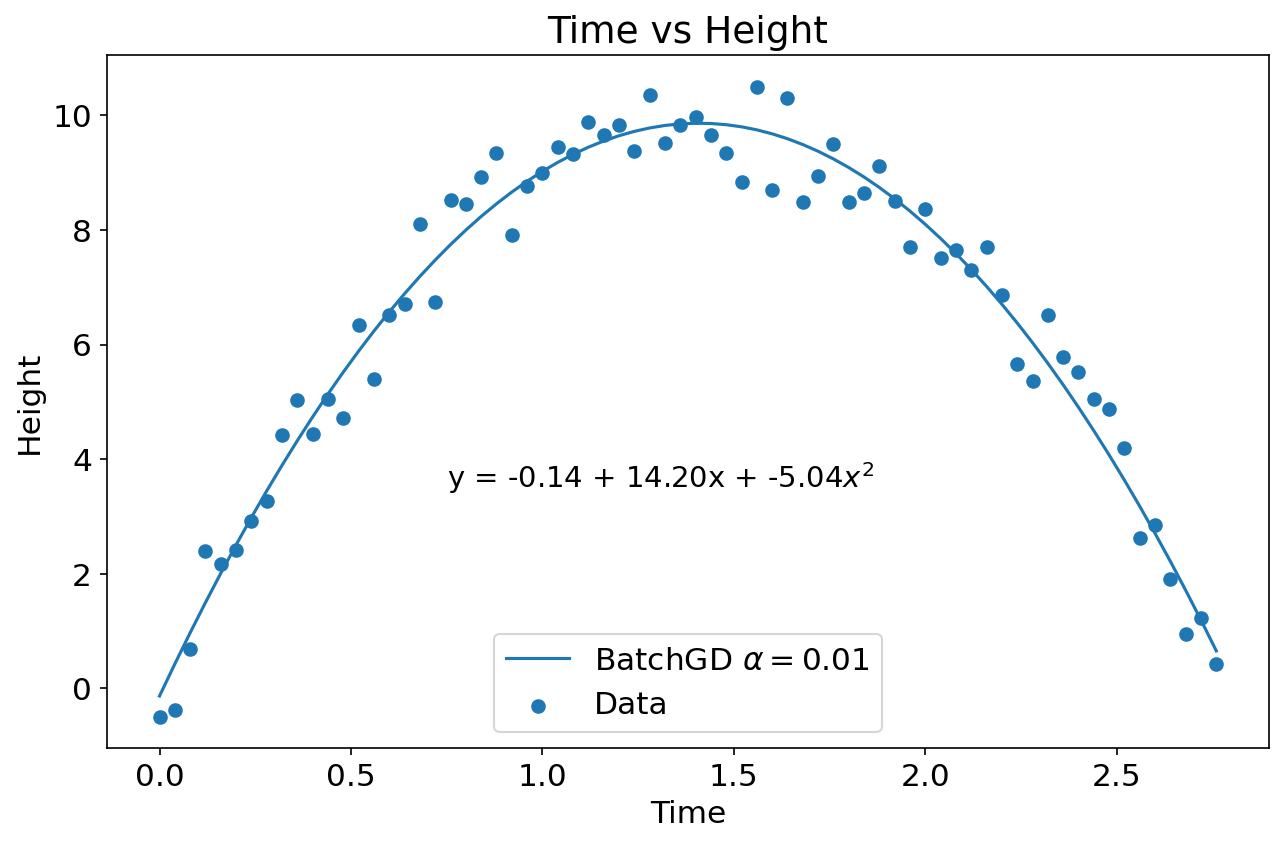

<Figure size 1500x900 with 0 Axes>

In [28]:
plt.plot(X[:,0],batch_pred, label='BatchGD $\\alpha=0.01$')
plt.scatter(X[:,0],y, label="Data")
# display the equation of the line
plt.text(0.75, 3.5, 'y = {:.2f} + {:.2f}x + {:.2f}$x^2$'.format(batch_gd.weights[0], batch_gd.weights[1], batch_gd.weights[2]), fontsize=14)
plt.xlabel('Time')
plt.ylabel('Height')
plt.title("Time vs Height")
plt.legend()
plt.show()
plt.savefig('figures/0102.png')

- Let's check the R2 score of the Batch Gradient Descent model:

In [29]:
r2 = batch_gd.r2_score(X, y)
print(f"R2 Score: {r2:.4f}")

R2 Score: 0.9685


***

### 2. Implement stochastic gradient descent for optimization of weights. Plot cost history (J) vs number of iterations for both cases batch gradient descent and stochastic gradient descent. Comment on the difference, if any

In [30]:
# Create the instance of Stochastic GD
sch_gd = StochasticGD(alpha=alpha,max_iter=max_iter,bias=True)

In [31]:
# Training the Stochastic GD model
sch_gd.fit(X,y)

In [32]:
# optimum weights after StochasticGD
sch_gd.weights

array([-0.10994961, 14.19151059, -5.03133495])

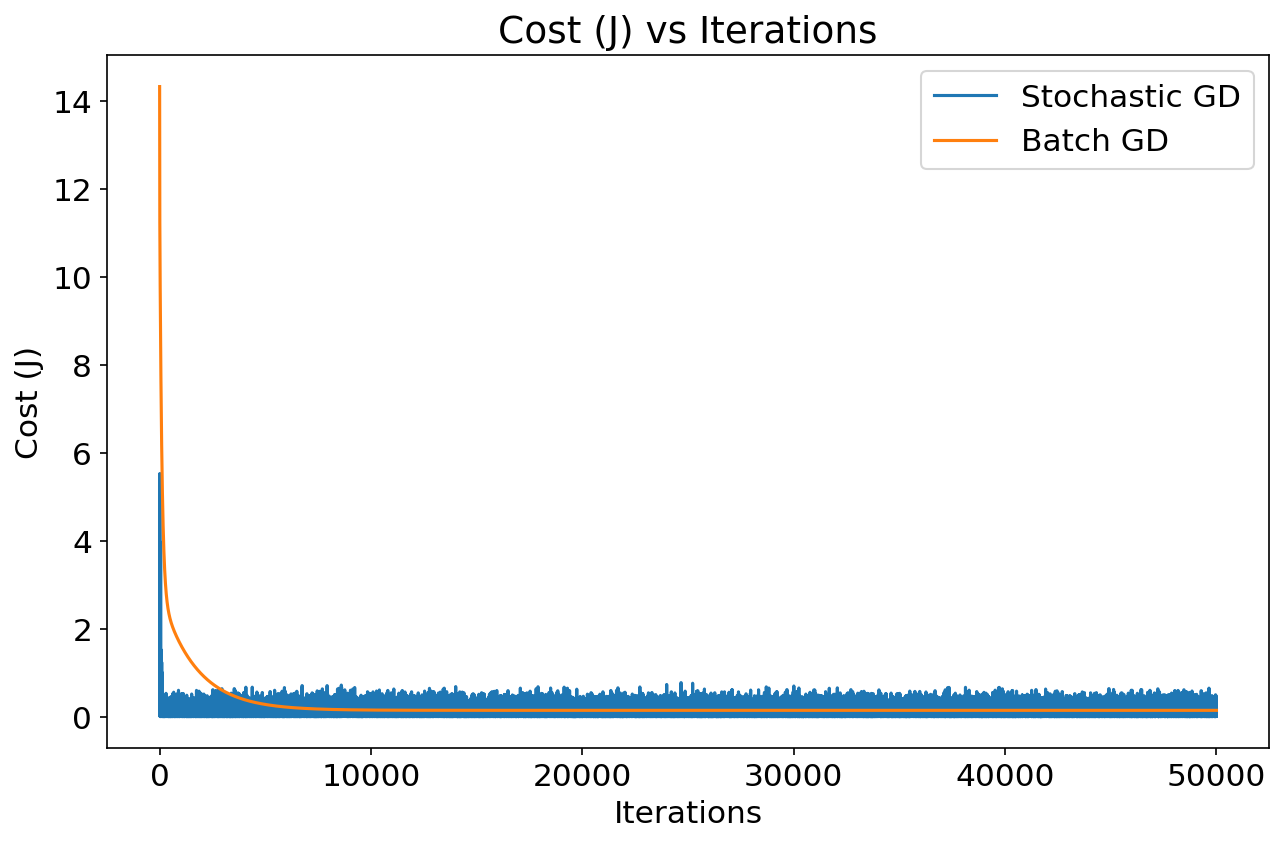

<Figure size 1500x900 with 0 Axes>

In [36]:
# Plotting the cost history
plt.plot(sch_gd.loss_history, label='Stochastic GD')
plt.plot(batch_gd.loss_history, label='Batch GD')
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.title("Cost (J) vs Iterations")
plt.legend()
plt.show();
plt.savefig('figures/0103.png');

- From above graph we can see that Stochastic Gradient Descent's Loss decreased at much faster rate than the Batch GD, but also there is a lot of noise in the loss curve.

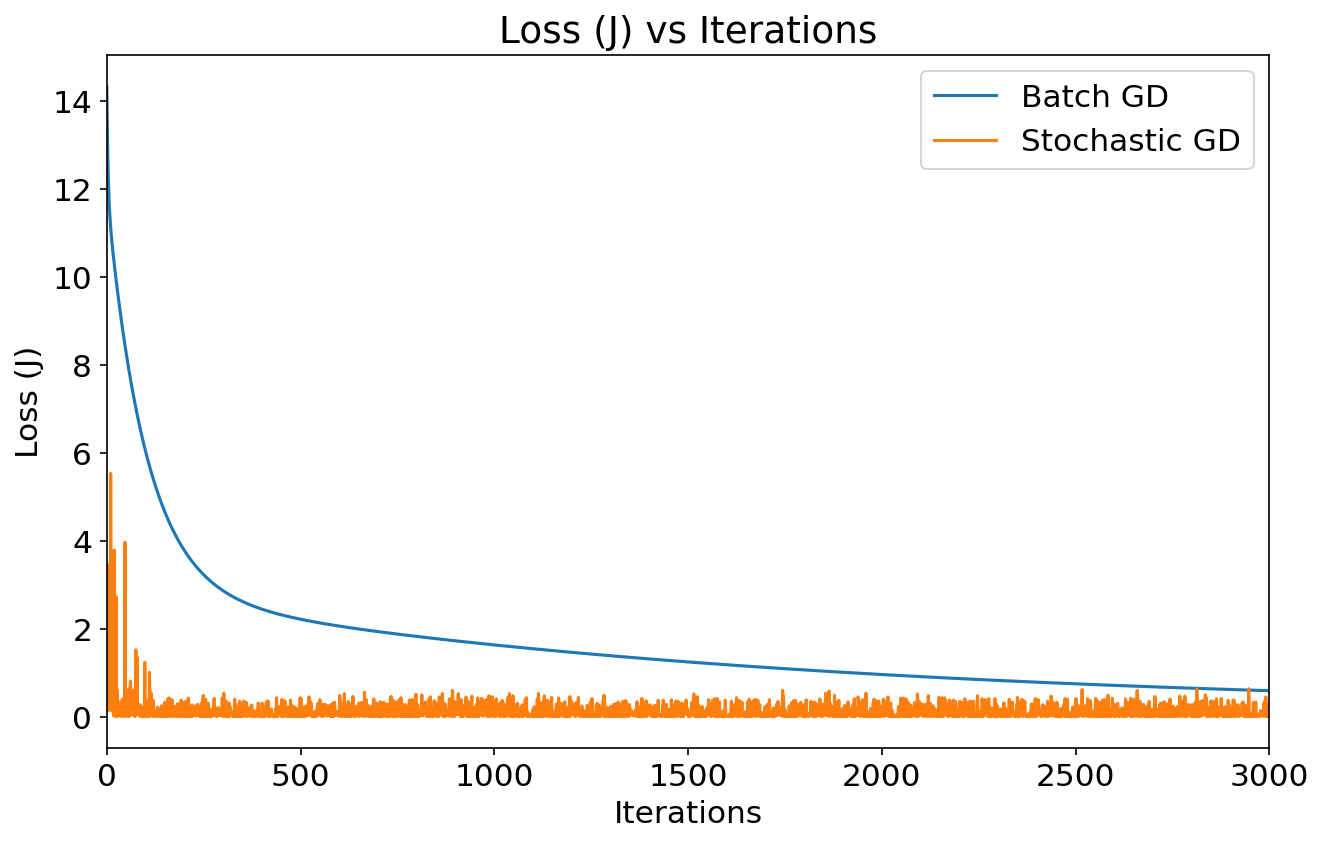

<Figure size 1500x900 with 0 Axes>

In [37]:
plt.plot(batch_gd.loss_history, label='Batch GD')
plt.plot(sch_gd.loss_history, label='Stochastic GD')
plt.xlabel('Iterations')
plt.ylabel('Loss (J)')
plt.title("Loss (J) vs Iterations")
plt.legend()
plt.xlim(0,3000)
plt.show()
plt.savefig('figures/0104.png')

- So here we can see that Stochastic GD achieved its optimum point in under 100 iterations while Batch haven't got there in about 3000 iterations

- Let's check the R2 score of the Stochastic Gradient Descent model:

In [38]:
r2 = sch_gd.r2_score(X, y)
print(f"R2 Score: {r2:.4f}")

R2 Score: 0.9683


- Plot the fitted line for both the cases

In [39]:
sch_pred = sch_gd.predict(X)

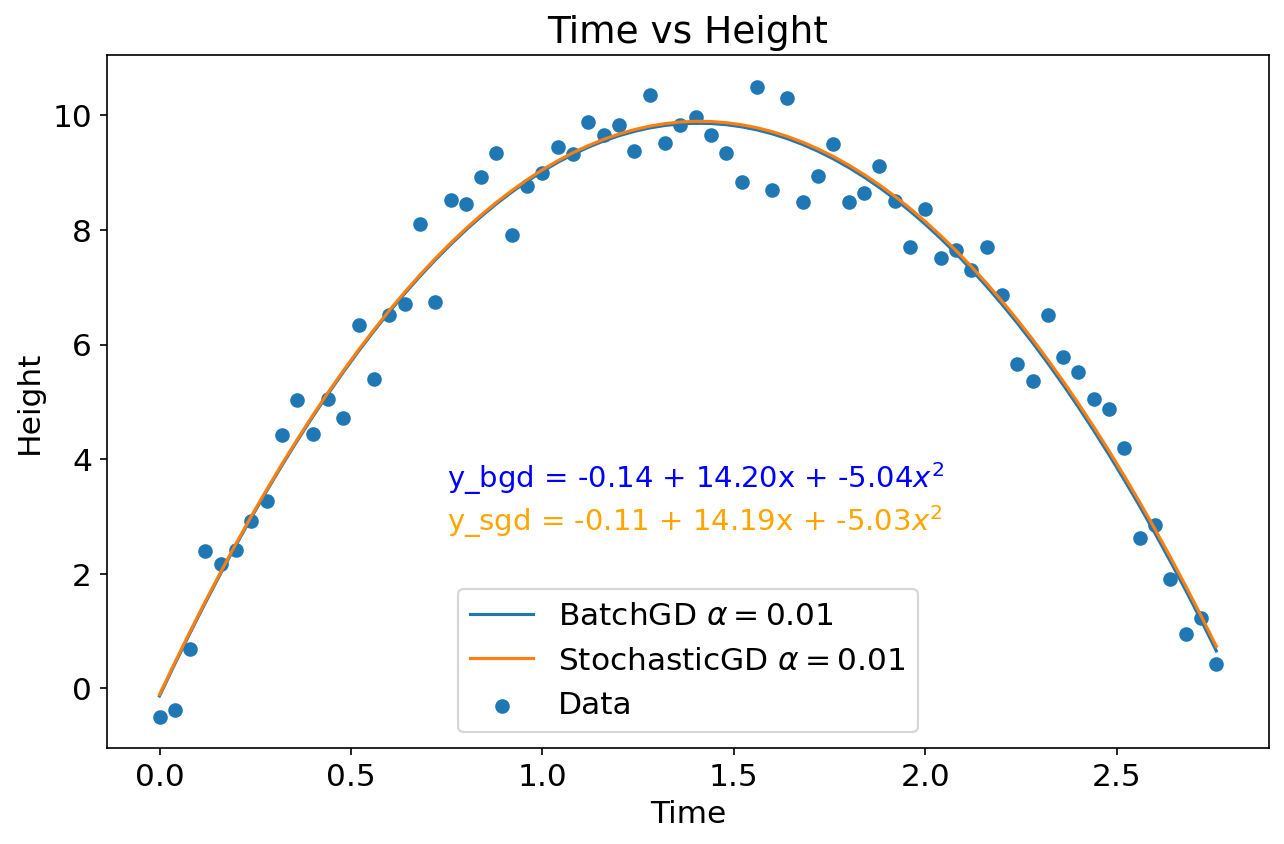

<Figure size 1500x900 with 0 Axes>

In [45]:
plt.plot(X[:,0],batch_pred, label='BatchGD $\\alpha=0.01$')
plt.plot(X[:,0],sch_pred, label='StochasticGD $\\alpha=0.01$')
plt.scatter(X[:,0],y, label="Data")
# display the equation of the line
plt.text(0.75, 3.5, 'y_bgd = {:.2f} + {:.2f}x + {:.2f}$x^2$'.format(batch_gd.weights[0], batch_gd.weights[1], batch_gd.weights[2]), fontsize=14, color='blue')
plt.text(0.75, 2.75, 'y_sgd = {:.2f} + {:.2f}x + {:.2f}$x^2$'.format(sch_gd.weights[0], sch_gd.weights[1], sch_gd.weights[2]), fontsize=14, color='orange')
plt.xlabel('Time')
plt.ylabel('Height')
plt.title("Time vs Height")
plt.legend()
plt.show()
plt.savefig('figures/0105.png')

***

### 3. Plot the cost history (J) vs number of iterations for different learning rates (α = 0.1, 0.5, 0.01, 0.05). Write your inferences from the plot

- I am using here Batch Gradient descent as that was showing better result as that is not so much prone to $\alpha$ as that consider the whole data points before updating the weights 

- Ploting cost history (J) vs iteration for dirrent learning rates (Stochastic GD)

In [48]:
batch_1 = BatchGD(alpha=0.1,max_iter=max_iter)
batch_5 = BatchGD(alpha=0.5,max_iter=max_iter)
batch_01 = BatchGD(alpha=0.01,max_iter=max_iter)
batch_05 = BatchGD(alpha=0.05,max_iter=max_iter)

In [49]:
batch_1.fit(X,y);
batch_5.fit(X,y);
batch_01.fit(X,y);
batch_05.fit(X,y);

Loss is nan at iteration 388. Hence, stopping the training


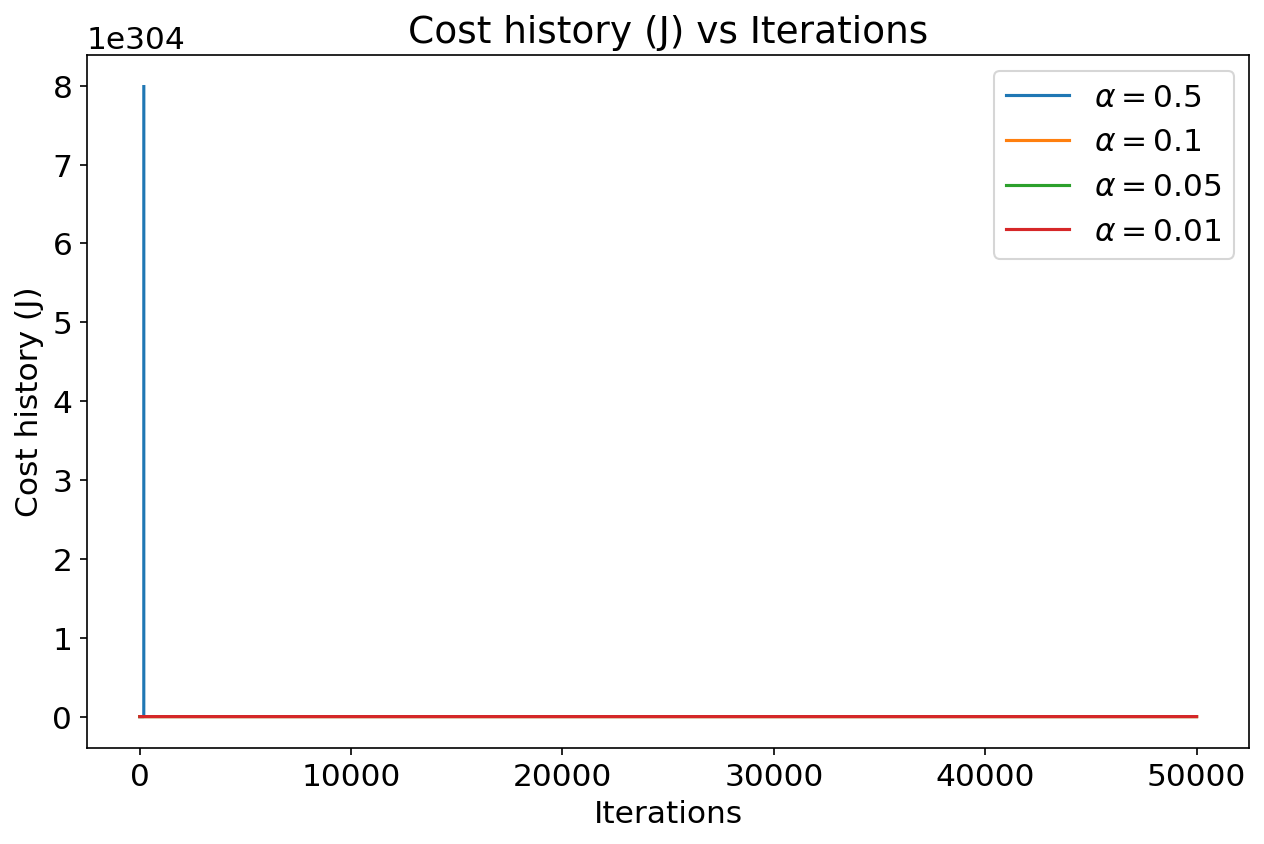

<Figure size 1500x900 with 0 Axes>

In [50]:
plt.plot(batch_5.loss_history, label='$\\alpha=0.5$')
plt.plot(batch_1.loss_history, label='$\\alpha=0.1$')
plt.plot(batch_05.loss_history, label='$\\alpha=0.05$')
plt.plot(batch_01.loss_history, label='$\\alpha=0.01$')
plt.xlabel('Iterations')
plt.ylabel('Cost history (J)')
plt.title("Cost history (J) vs Iterations")
plt.legend()
plt.show()
plt.savefig('figures/0106.png')

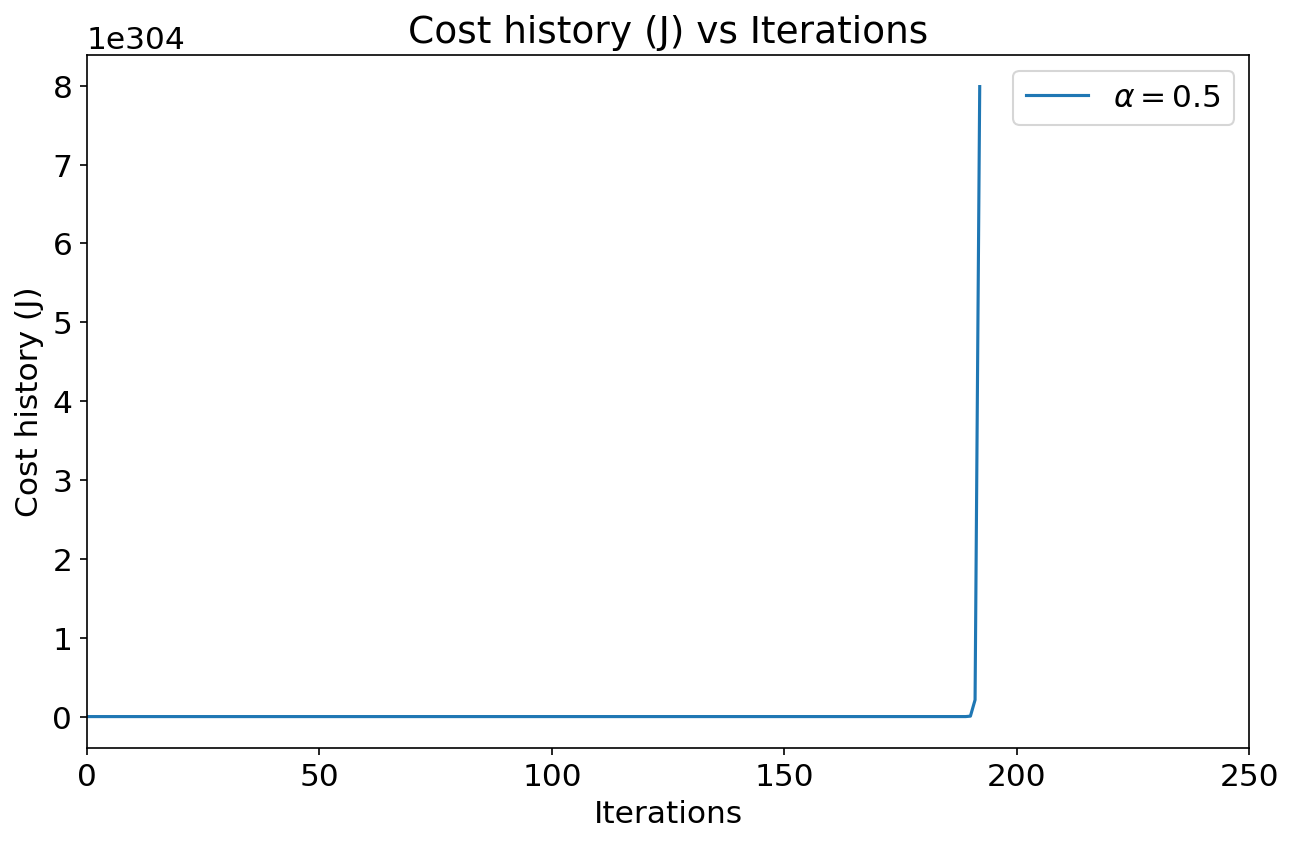

<Figure size 1500x900 with 0 Axes>

In [59]:
plt.plot(batch_5.loss_history, label='$\\alpha=0.5$')
plt.xlim(0,100)
plt.xlabel('Iterations')
plt.ylabel('Cost history (J)')
plt.title("Cost history (J) vs Iterations")
plt.legend()
plt.xlim(0,250)
plt.show()
plt.savefig('figures/0107.png')

- So here for $\alpha$=0.01, 0.05 and 0.1 **batch Gradient Descent** Converges but for $\alpha$ = 0.5 it diverges and reaches to very large value

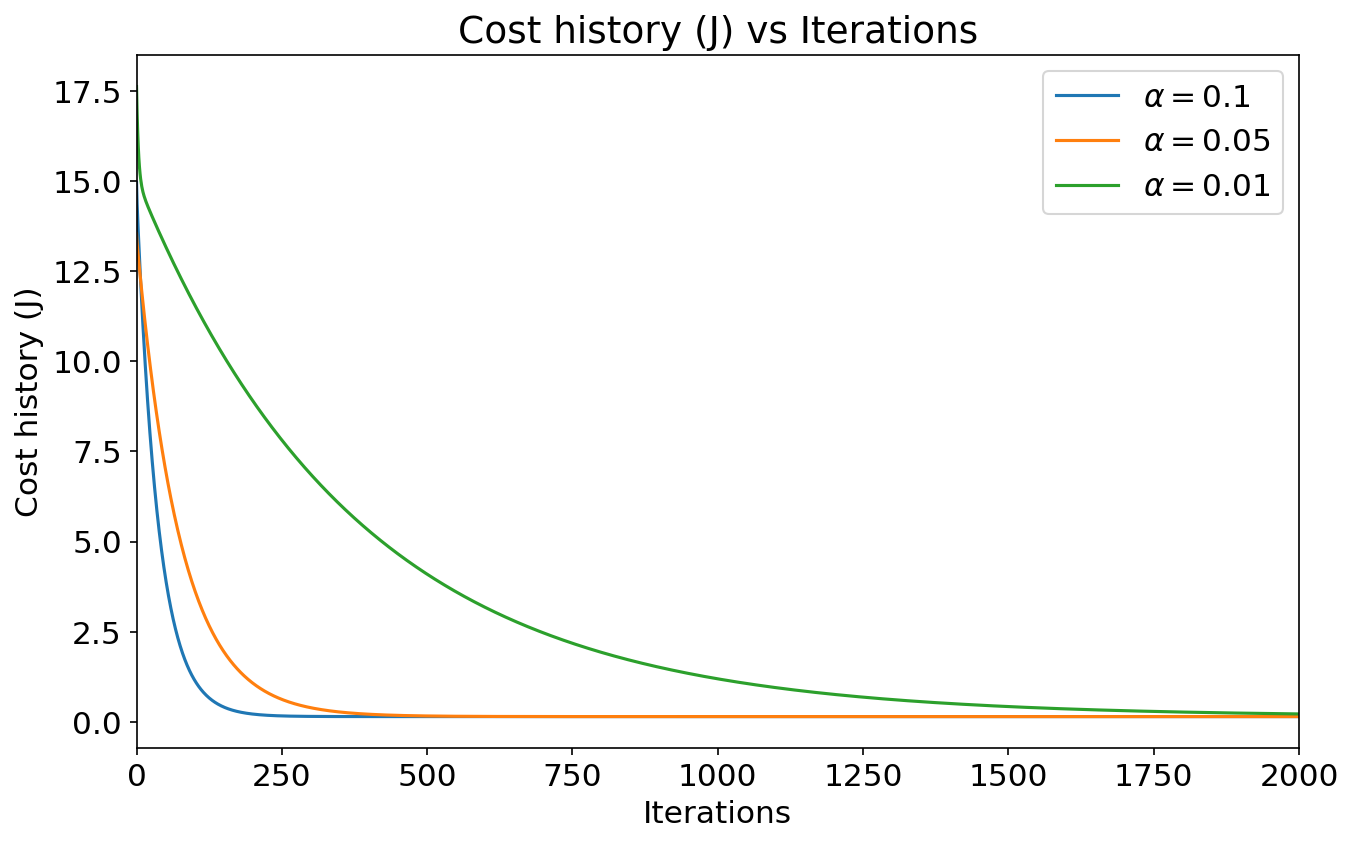

<Figure size 1500x900 with 0 Axes>

In [60]:
plt.plot(batch_1.loss_history, label='$\\alpha=0.1$')
plt.plot(batch_05.loss_history, label='$\\alpha=0.05$')
plt.plot(batch_01.loss_history, label='$\\alpha=0.01$')
plt.xlabel('Iterations')
plt.ylabel('Cost history (J)')
plt.title("Cost history (J) vs Iterations")
plt.legend()
plt.xlim(0,2000)
plt.show()
plt.savefig('figures/0108.png')

- Here we can see that as the $\alpha$ increases the loss decreases at faster rate.

***

### 4. Implement line search method (Secant method) to find learning rate (α). Optimize the weights using batch gradient descent and plot the cost history (J) vs number of iterations for variable learning rate. Comment on the difference between implementing line search method and choosing arbitrary α. 

***

- Let's try to visualize the loss vs $\alpha$ for different values of $\alpha$ at one iteration

- let's define a function to calculate the loss for a given $\alpha$

In [61]:
def _preprocess_input_data(X):
        
    # if input data is not numpy.ndarray then  convert it
    if isinstance(X,np.ndarray):
        pass
    else:
        X = np.array(X)

    # if only one sample is given then reshape it
    if X.ndim  == 1:
        X = X.reshape(1, -1)
    
    return X.astype(np.float64)

X = _preprocess_input_data(X)

In [62]:
def _y_hat( X, w):
    return np.dot(X, w.T)

def _cal_loss( y_hat, y_true):
    # no. of training examples
    m = len(y_true)

    # initialize loss
    total_loss = 0

    # calculate cost
    # y_hat = self._y_hat(X, w)
    total_cost = np.sum(np.square(y_hat - y_true))
    # return cost
    return total_cost / (2 * m)

def _cal_gradient( y_hat ,y_true , X):
        
    # no. of training examples
    m = len(y_true)

    gradient = np.matmul((y_hat- y_true), X) / m

    # return gradient
    return gradient

In [63]:
# this is out linear search function which at each epoch is a function 
# of learning rate , b/c weights are updated at each epoch

def phi(lr, weights):
    y_hat = _y_hat(X, weights)
    grad = _cal_gradient( y_hat, y, X)

    weights_new = weights - lr * grad
    y_hat_new = _y_hat(X, weights_new)

    return _cal_loss(y_hat_new, y)

In [64]:
phi(0.05, np.array([0,0]))

15.432781327066323

- Plots are for the random weight b/w 0,1

- let's plot the loss vs $\alpha$ for different values of $\alpha$

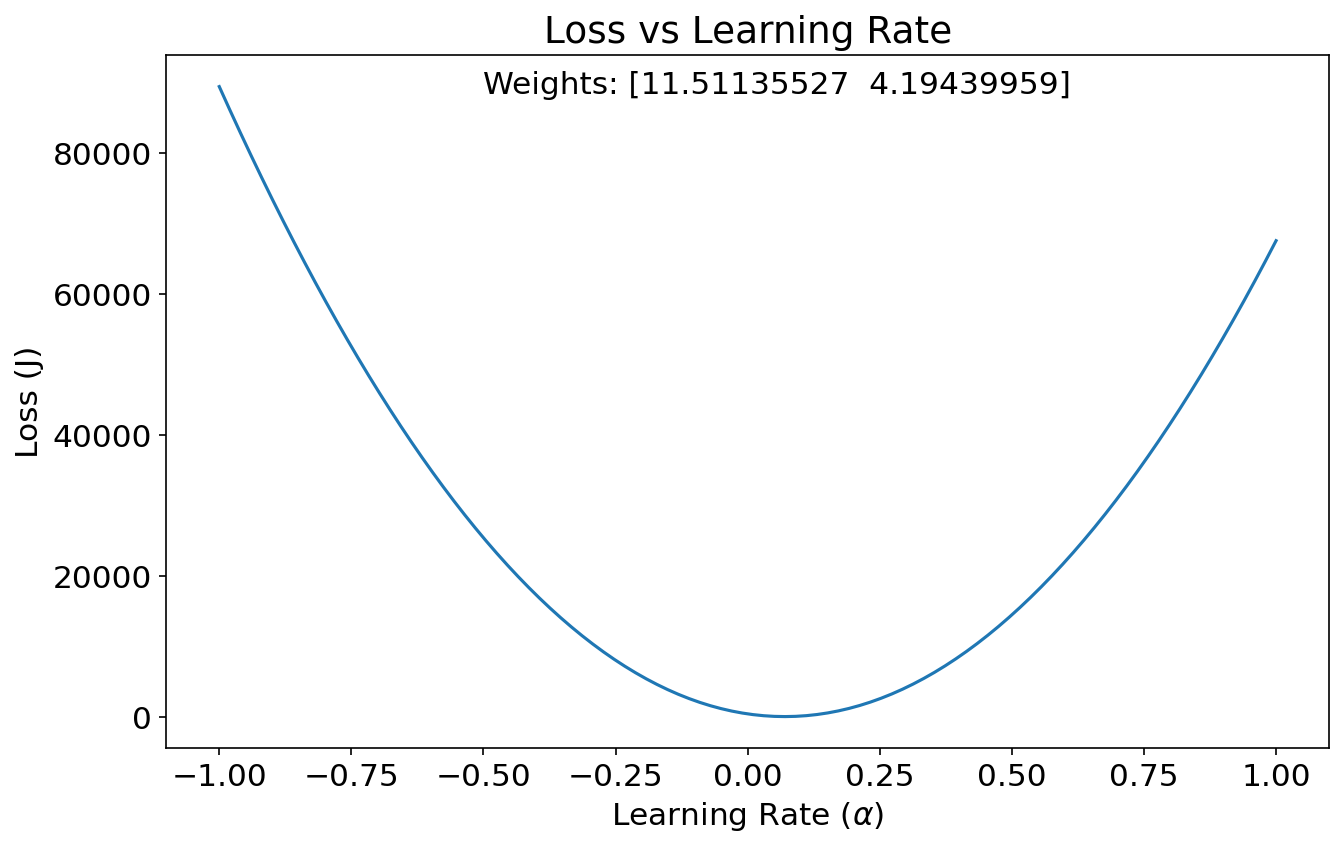

<Figure size 1500x900 with 0 Axes>

In [77]:
def plot_lr_loss(weights, n):
    lr = np.linspace(-1,1,n)
    loss = np.zeros(n)
    for i in range(n):
        loss[i] = phi(lr[i], weights)
    plt.plot(lr, loss)
    plt.xlabel('Learning Rate ($\\alpha$)')
    # show the weights 
    plt.text(-0.5, max(loss)-1e3, f'Weights: {weights}')
    
    plt.ylabel('Loss (J)')
    plt.title('Loss vs Learning Rate')
    plt.show()
    plt.savefig('figures/0109.png')

plot_lr_loss(np.random.random(X.shape[1])*14, 100)

- So this is the Loss vs $\alpha$ at one iteration which is only the function of $\alpha$ , so we can find the optimum value of $\alpha$ by finding the minimum of this function

- and we can also see that it's minima is almost near zero, so we can say that $\alpha$ near zero is the best choice

#### Secant Method

The secant method which is similar to the Newton-Raphson method is used to find the extremum value for a function over an interval for which the defined function has only one extremum. If there is more then one minimum or maximum, then convergence is not guaranteed.



The advantage over the Newton-Raphson method is that the secant method does not require the second derivative so only one function is used, the derivative. However, two initial guesses are needed. The algorithm to find the extremum is to iterate using the following expression

$$ x_{k} = x_{k} - f'(x_{k})\frac{(x_{k} - x_{k-1})}{f'(x_{k}) - f'(x_{k-1})} $$


- So to search the optimum value of $\alpha$ at each iteration and update the $\alpha$ accordingly 

***

- I have made a class LinearSearchGD in which I have implemented the following:

1. defined a method $\phi$, which is our actual loss function for a particular epoch, with different $\alpha$
2. to find the $\alpha$ corresponding the minima of $\phi$ using Linear Search (Secant Method), We will need a derivative of the $\phi$ 
3. To calculate the derivative of $\phi$ at a given $\alpha$ I used the Central Difference Method
4. then defined a `secant` method which actually itterate recurcively by updating the $\alpha$ untill the change in $\phi$ for two succesive value of $\alpha$ becomes less than `1e-4`
5. then in `optimize_lr` method for each epoch I have defined the bound on $\alpha$ =`[1e-4, 0.9]` as very less/large value of $\alpha$ will lead to slow convergence or divergence respectively
6. Then finally in the  updated the $\alpha$ at each epoch by calling `optimize_lr`

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from GradientDescent import LinearSearchGD, BatchGD
df = pd.read_csv("first.csv")

X = df.drop('y', axis=1)
y = df['y']

In [78]:
# Defining a callback function to track the loss at each epoch
alpha_epoch = []
def callback_func(alpha):
    alpha_epoch.append(alpha)

In [84]:
lin_search_gd = LinearSearchGD( max_iter=50000, bias=True, tol=1e-8)

In [85]:
lin_search_gd.fit(X, y, callback_func)

Loss is not changing much at iteration 857. Hence, stopping the training


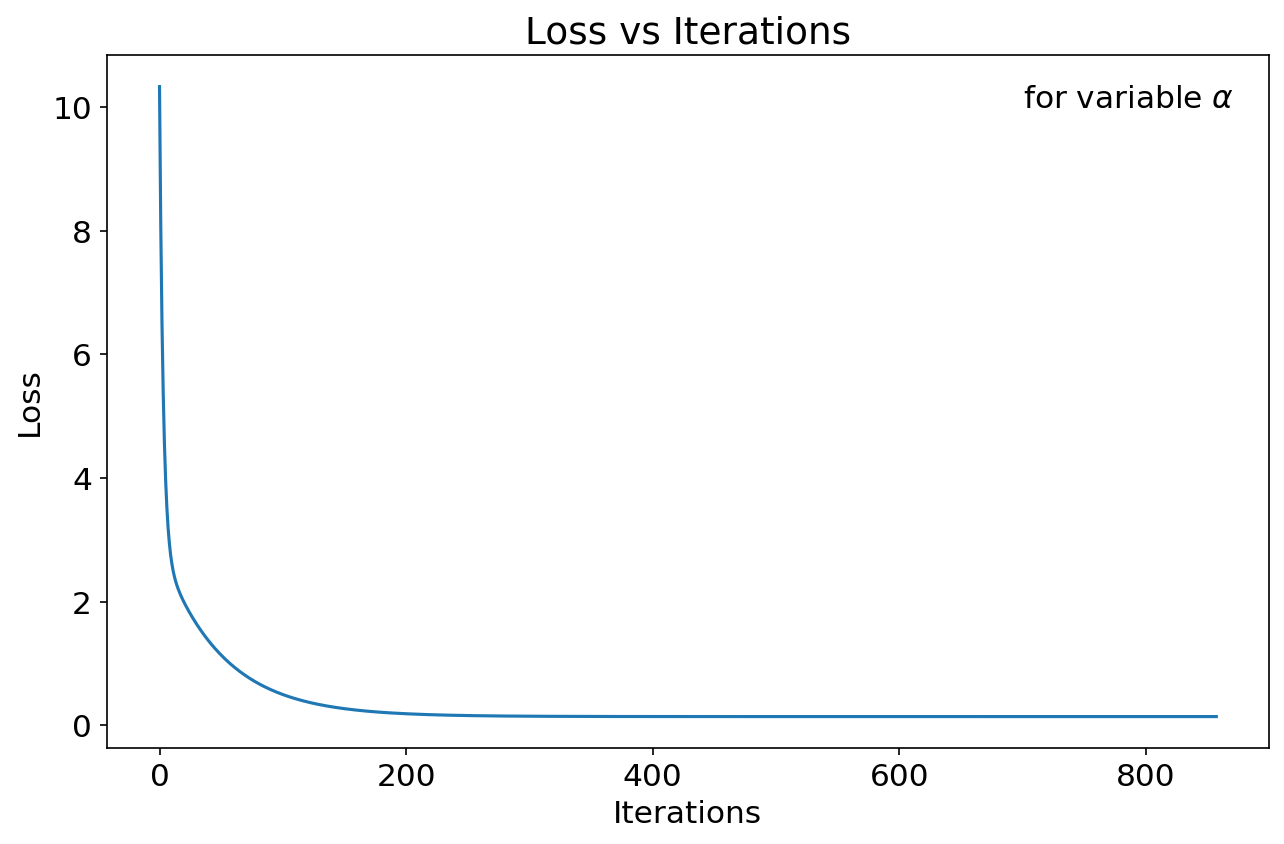

<Figure size 1500x900 with 0 Axes>

In [94]:
plt.plot(lin_search_gd.loss_history, label='Linear Search GD')
# add test showing varable alpha
plt.text(700, 10, f'for variable $\\alpha$')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.show()
plt.savefig('figures/0110.png')

In [98]:
len(alpha_epoch) , len(lin_search_gd.loss_history)

(3128, 858)

- As Loss converged early at 858 iterations, so I have to only plot the Loss vs Learning Rate for 858 iterations

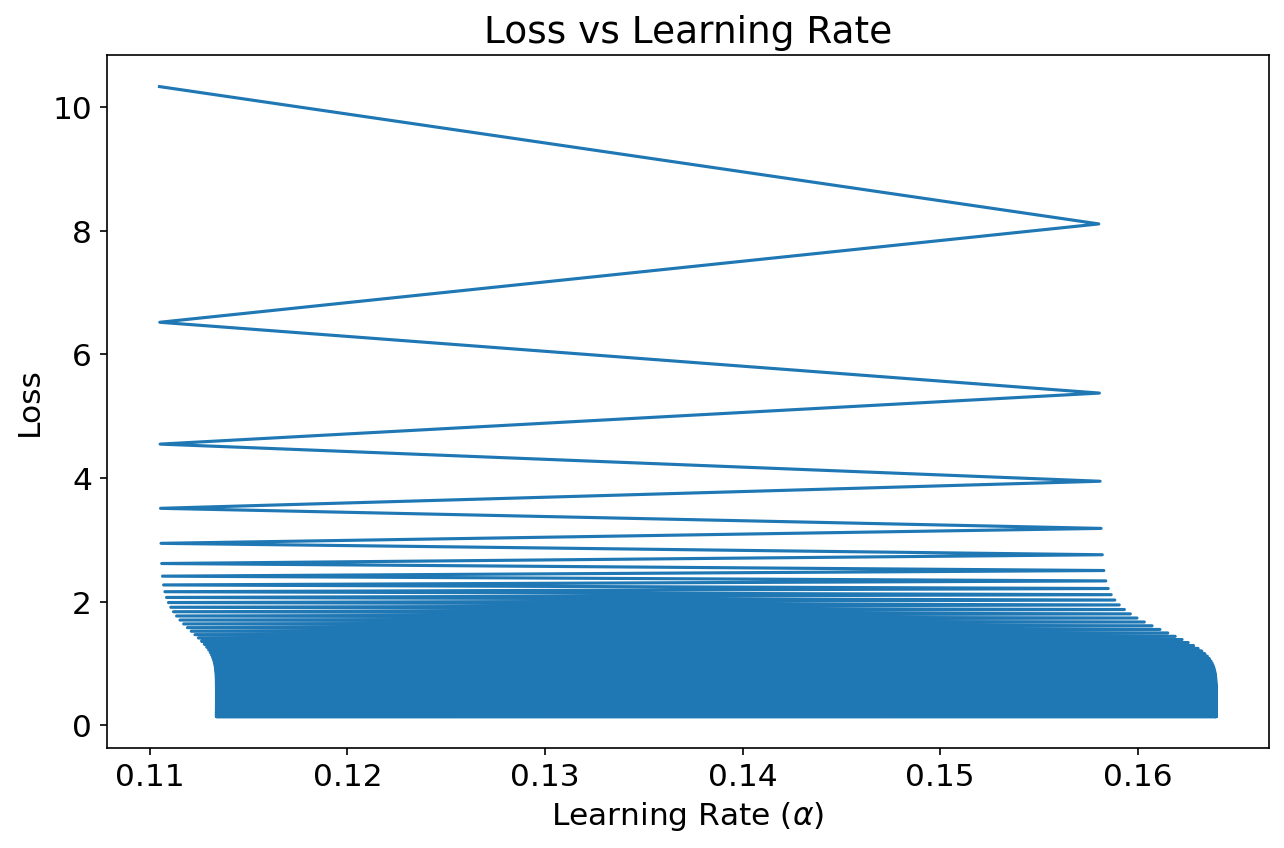

<Figure size 1500x900 with 0 Axes>

In [103]:
plt.plot(alpha_epoch[:len(lin_search_gd.loss_history)], lin_search_gd.loss_history);
plt.xlabel('Learning Rate ($\\alpha$)')
plt.ylabel('Loss')
plt.title('Loss vs Learning Rate')
plt.show()
plt.savefig('figures/0111.png')

- Let's check the R2 score of the Linear Search Gradient Descent model:

In [105]:
r2  = lin_search_gd.r2_score(X, y)
print(f'R2 score: {r2:.4f}')

R2 score: 0.9685


- let's check the same r2 score and loss vs iteration in case of Batch Gradient Descent with constant $\alpha$ for the same parameters and  number of iterations with $\alpha$ = 0.1

In [106]:
batch_gd_constalpha = BatchGD( max_iter=5000, bias=True, tol=1e-8, alpha=0.1)
batch_gd_constalpha.fit(X, y)

In [107]:
r2 = batch_gd_constalpha.r2_score(X, y)
print(f'R2 score: {r2:.4f}')

R2 score: 0.9685


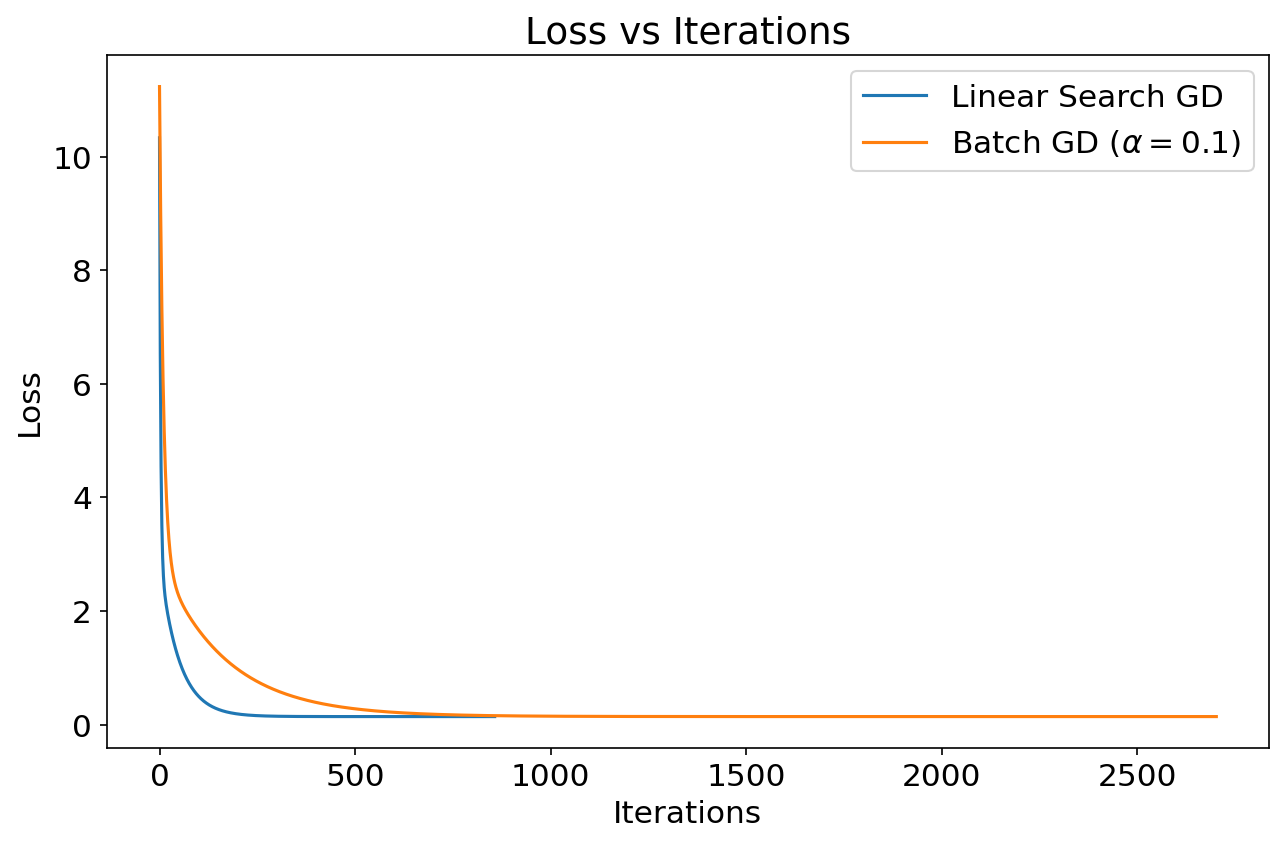

<Figure size 1500x900 with 0 Axes>

In [113]:
# plot both the loss history
plt.plot(lin_search_gd.loss_history, label='Linear Search GD')
plt.plot(batch_gd_constalpha.loss_history, label='Batch GD ($\\alpha=0.1$)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.legend()
plt.show()
plt.savefig('figures/0112.png')

- here we can see that for the same number of iterations Linear Search GD has achieved a very less loss and very soon even less than 200 ierations than the constant $\alpha$ Batch GD